<a href="https://colab.research.google.com/github/tegerte/1/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from seaborn.palettes import color_palette
import seaborn as sb

import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.utils.np_utils import to_categorical

from keras.datasets import mnist
import random
sb.set_theme(style="darkgrid")

In [17]:
np.random.seed(0)
num_f_samples = []
cols = 10
num_classes = 10

In [18]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [19]:
print(X_train.shape)

(60000, 28, 28)


In [20]:
assert(X_train.shape[0] == y_train.shape[0]), 'Not all samples are labelled!'
assert(X_test.shape[0] == y_test.shape[0]), 'Not all samples are labelled!'
assert(X_train.shape[1:] == (28,28)), 'image dimensions not correct!'
assert(X_test.shape[1:] == (28,28)), 'image dimensions not correct!'

In [21]:
X_train.shape[1:]==(28,28)

True

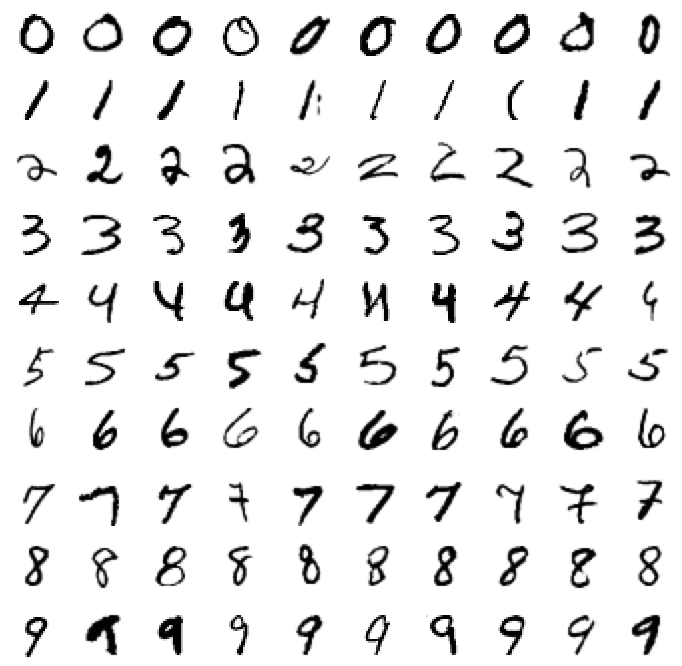

In [27]:
num_f_samples = {}
fig, ax = plt.subplots(nrows=num_classes, ncols=cols, figsize=(12,12))
#fig.tight_layout()

for i in range(cols):
  for j in range(num_classes):
    x_sel = X_train[y_train==j]
    ax[j][i].axis('off')
    ax[j][i].imshow(x_sel[random.randint(0,len(x_sel-1)),:,:], cmap='Greys')
    if i ==2:
      num_f_samples[j]=(len(x_sel))
    
   

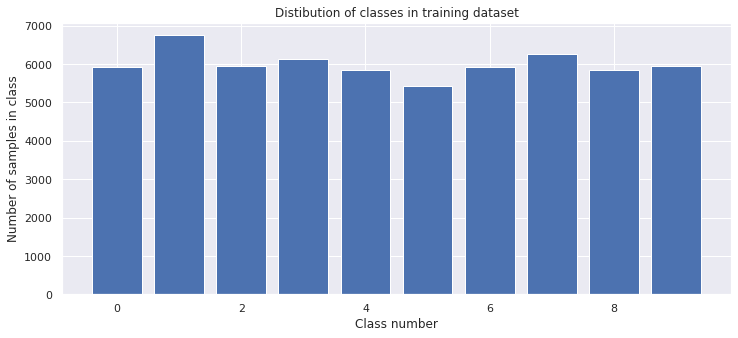

In [42]:
plt.figure(figsize=(12,5))
#plt.bar(num_f_samples.keys(), num_f_samples.values())
plt.bar(*zip(*num_f_samples.items()))
plt.xlabel('Class number')
plt.ylabel('Number of samples in class')
plt.title('Distibution of classes in training dataset');

In [41]:
print(*zip(*num_f_samples.items()))

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9) (5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949)
